<a href="https://colab.research.google.com/github/Parth-Parmar1/Parth-Parmar1/blob/main/2021_12_22_ParthParmar_Project60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Simple linear regression III - Model Evaluation
 

---

#### Getting Started:

1. Click on this link to open the Colab file for this project.

  https://colab.research.google.com/drive/1N-dDFw8zhfw7yKCrrEaN3xz8XepFnM0Z

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project60** format.

4. Now, write your code in the prescribed code cells.


---

### Problem Statement

The most important factor for an Insurance Company is to determine what premium charges must be paid by an individual. The charges depend on various factors like age, gender, income, etc. 

Build a model that is capable of predicting the insurance charges a person has to pay depending on his/her age using simple linear regression. Also, evaluate the accuracy of your model by calculating the value of error metrics such as R-squared, MSE, RMSE, and MAE.




---

### List of Activities

**Activity 1:** Analysing the dataset

  
**Activity 2:**  Train-Test split

**Activity 3:**  Model Training

**Activity 4:** Model Prediction and Evaluation







---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **Insurance** dataset using the below link. This dataset consists of following columns:

|Field|Description|
|---:|:---|
|age|Age of primary beneficiary|
|sex|Insurance contractor gender, female or male|
|bmi|Body mass index|
|children|Number of children covered by health insurance/number of dependents|
|region|Beneficiary's residential area in the US, northeast, southeast, southwest, northwest|
|charges|Individual medical costs billed by health insurance|


  **Dataset Link:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/insurance_dataset.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.

- Create a regression plot with `age` on X-axis and `charges` on Y-axis to identify the relationship between these two attributes.




In [ ]:
# Import modules
import pandas as pd
import numpy as np
# Load the dataset
# Dataset Link: 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/insurance_dataset.csv'
df=pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/insurance_dataset.csv')
# Print first five rows using head() function
df.head(10)

,age,sex,bmi,children,region,charges
0,18,male,33.770,1,southeast,1725.55230
1,28,male,33.000,3,southeast,4449.46200
2,33,male,22.705,0,northwest,21984.47061
3,32,male,28.880,0,northwest,3866.85520
4,31,female,25.740,0,southeast,3756.62160
5,46,female,33.440,1,southeast,8240.58960
6,37,female,27.740,3,northwest,7281.50560
7,37,male,29.830,2,northeast,6406.41070
8,60,female,25.840,0,northwest,28923.13692
9,25,male,26.220,0,northeast,2721.32080


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
region      0
charges     0
dtype: int64

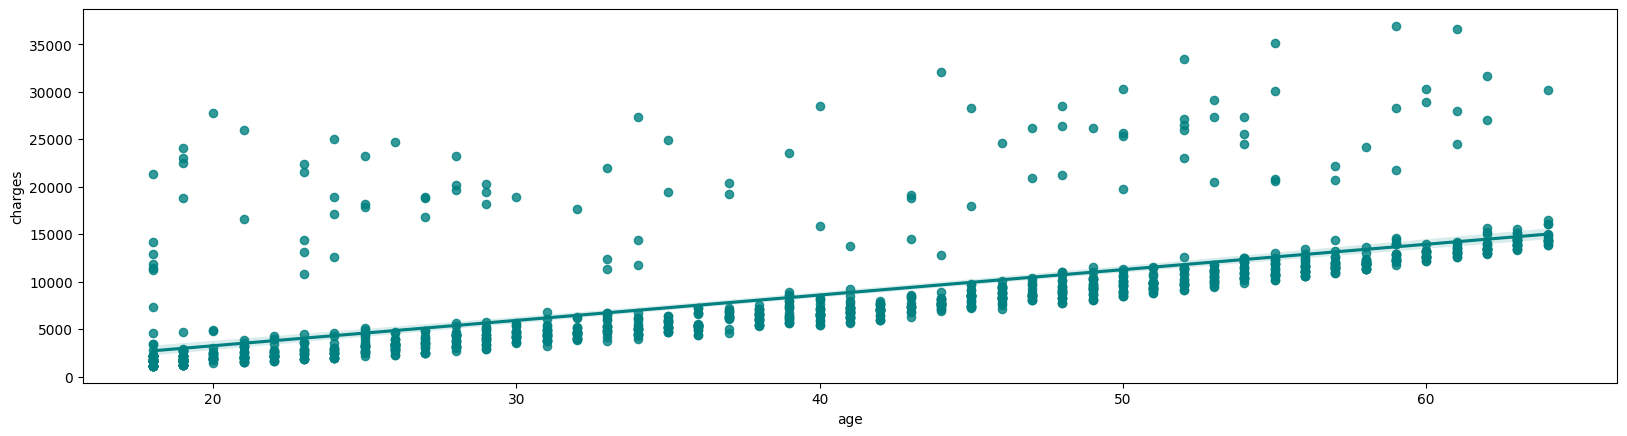

In [ ]:
# Create a regression plot between 'age' and 'charges'
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5),dpi=99)
sns.regplot(x="age",y="charges",data=df,color='teal',)
plt.show()

---

#### Activity 2: Train-Test Split

We have to determine the effect of `age` on insurance charges. Thus, `age` is the feature variable and `charges` is the target variable. 

Split the dataset into training set and test set such that the training set contains 67% of the instances and the remaining instances will become the test set.

In [ ]:
# Split the DataFrame into the training and test sets.
from sklearn.model_selection import train_test_split
x=df['age']
y=df['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

---

#### Activity 3: Model Training

Implement simple linear regression using `sklearn` module in the following way:

1. Reshape the feature and the target variable arrays into two-dimensional arrays by using `reshape(-1, 1)` function of numpy module.
2. Deploy the model by importing the `LinearRegression` class and create an object of this class.
3. Call the `fit()` function on the LinearRegression object and print the slope and intercept values of the best fit line.


In [ ]:
# 1. Create two-dimensional NumPy arrays for the feature and target variables. 
# Print the shape or dimensions of these reshaped arrays
print(x_train.shape)
x_train_reshaped=x_train.values.reshape(-1,1)
y_train_reshaped=y_train.values.reshape(-1,1)
x_test_reshaped=x_test.values.reshape(-1,1)
y_test_reshaped=x_test.values.reshape(-1,1)
print('after')
print(x_train_reshaped.shape)

(712,)
after
(712, 1)


In [ ]:
# 2. Deploy linear regression model using the 'sklearn.linear_model' module.
from sklearn.linear_model import LinearRegression
  # Create an object of the 'LinearRegression' class.
linear_regression=LinearRegression()

# 3. Call the 'fit()' function
linear_regression.fit(x_train_reshaped,y_train_reshaped)

 # Print the slope and intercept values
print(f'Slope is {linear_regression.coef_}')
print(f'Intercept is {linear_regression.intercept_}')
print(f'equation is y={linear_regression.coef_}x+({linear_regression.intercept_})')

Slope is [[258.95102199]]
Intercept is [-1810.68155281]
equation is y=[[258.95102199]]x+([-1810.68155281])


---

#### Activity 4: Model Prediction and Evaluation

Predict the values for both training and test sets by calling the `predict()` function on the LinearRegression object. Also, calculate the $R^2$, MSE, RMSE and MAE values to evaluate the accuracy of your model.

In [ ]:
# Predict the target variable values for both training set and test set
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_train_pred=linear_regression.predict(x_train_reshaped)
y_test_pred=linear_regression.predict(x_test_reshaped)
print(f'R Square : {r2_score(y_train_reshaped,y_train_pred):.3f}')
print(f'MSE : {mean_squared_error(y_train_reshaped,y_train_pred):.3f}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_train_reshaped,y_train_pred)):.3f}')
print(f'MAE : {mean_absolute_error(y_train_reshaped,y_train_pred):.3f}')

print(f'R Square : {r2_score(y_test_reshaped,y_test_pred):.3f}')
print(f'MSE : {mean_squared_error(y_test_reshaped,y_test_pred):.3f}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test_reshaped,y_test_pred)):.3f}')
print(f'MAE : {mean_absolute_error(y_test_reshaped,y_test_pred):.3f}')


# Call 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module. Calculate RMSE value by taking the square root of MSE.
# Print these values for both training set and test set



R Square : 0.375
MSE : 22108233.952
RMSE : 4701.939
MAE : 2505.032
R Square : -417698.668
MSE : 82798818.837
RMSE : 9099.386
MAE : 8343.209


---

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project60**) of the notebook will get copied 

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project60** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800> 

---